Varianza de la muestra: 237.4402621392308
Desviación estándar de la muestra: 15.409096733398451
Rango de la muestra: nan


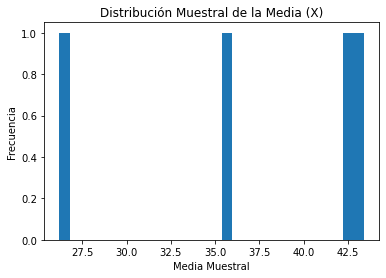

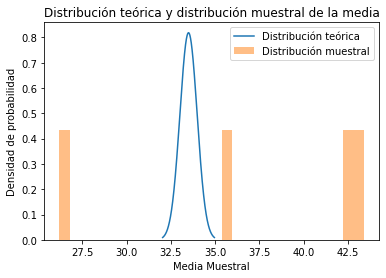

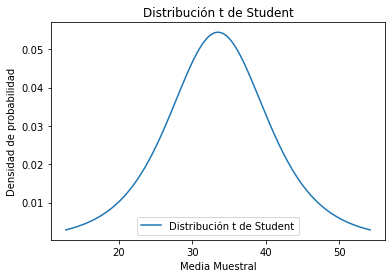

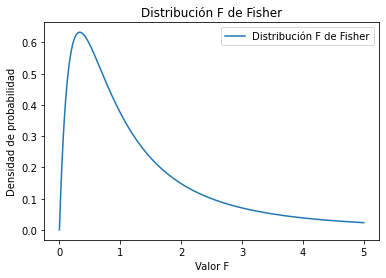

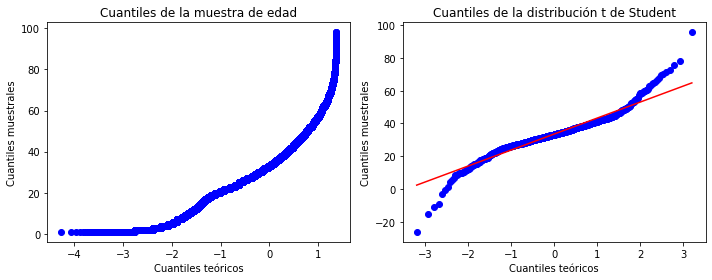

In [11]:
#BD4(VICTIMAS DE ACCIDENTES DE TRANSITO POR PROVINCIA) 
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

data = pd.read_excel("Victima Accidentes de Tránsito en Panama (provincia).xlsx")
#data=data.dropna()

# Obtener los valores de cada columna
año = data['Año']
clase_victima = data['Clase Victima']
condicion_victima = data['Condicion Victima']
sexo = data['Sexo']
edad = data['Edad']

# Cálculo de varianza, desviación estándar y rango de la muestra
varianza_edad = np.var(edad)
desviacion_estandar_edad = np.std(edad)
rango_edad = np.ptp(edad)

print("Varianza de la muestra:", varianza_edad)
print("Desviación estándar de la muestra:", desviacion_estandar_edad)
print("Rango de la muestra:", rango_edad)

# Distribución muestral de la media (X)
muestras = 10  # Número de muestras a generar
tamaño_muestra = 5  # Tamaño de cada muestra

medias_muestrales = []
for _ in range(muestras):
    muestra = np.random.choice(edad, size=tamaño_muestra, replace=True)
    media_muestra = np.mean(muestra)
    medias_muestrales.append(media_muestra)

# Gráfica de la distribución muestral de la media
plt.hist(medias_muestrales, bins=30)
plt.xlabel('Media Muestral')
plt.ylabel('Frecuencia')
plt.title('Distribución Muestral de la Media (X)')
plt.show()

# Teorema del límite central (Distribución de la media)
media_poblacional = np.mean(edad)
desviacion_estandar_poblacional = np.std(edad)
tamaño_muestra_grande = 1000

# Distribución teórica (basada en el teorema del límite central)
distribucion_media = stats.norm(loc=media_poblacional, scale=desviacion_estandar_poblacional / np.sqrt(tamaño_muestra_grande))

# Gráfica de la distribución teórica y la distribución muestral
x = np.linspace(media_poblacional - 3 * desviacion_estandar_poblacional / np.sqrt(tamaño_muestra_grande),
                media_poblacional + 3 * desviacion_estandar_poblacional / np.sqrt(tamaño_muestra_grande), 1000)
plt.plot(x, distribucion_media.pdf(x), label='Distribución teórica')
plt.hist(medias_muestrales, bins=30, density=True, alpha=0.5, label='Distribución muestral')
plt.xlabel('Media Muestral')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución teórica y distribución muestral de la media')
plt.legend()
plt.show()

# Distribución t de Student
grados_libertad = tamaño_muestra - 1
distribucion_t = stats.t(df=grados_libertad, loc=media_poblacional, scale=desviacion_estandar_poblacional / np.sqrt(tamaño_muestra))

# Gráfica de la distribución t de Student
x = np.linspace(media_poblacional - 3 * desviacion_estandar_poblacional / np.sqrt(tamaño_muestra),
                media_poblacional + 3 * desviacion_estandar_poblacional / np.sqrt(tamaño_muestra), 1000)
plt.plot(x, distribucion_t.pdf(x), label='Distribución t de Student')
plt.xlabel('Media Muestral')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución t de Student')
plt.legend()
plt.show()

# Distribución F de Fisher
grados_libertad_1 = tamaño_muestra - 1
grados_libertad_2 = tamaño_muestra - 1
distribucion_f = stats.f(dfn=grados_libertad_1, dfd=grados_libertad_2)

# Gráfica de la distribución F de Fisher
x = np.linspace(0, 5, 1000)
plt.plot(x, distribucion_f.pdf(x), label='Distribución F de Fisher')
plt.xlabel('Valor F')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución F de Fisher')
plt.legend()
plt.show()

# Gráficas de cuantiles
# Cuantiles de la muestra de edad
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
stats.probplot(edad, plot=plt)
plt.title('Cuantiles de la muestra de edad')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles muestrales')

# Cuantiles de la distribución t de Student
plt.subplot(1, 2, 2)
stats.probplot(distribucion_t.rvs(size=1000), plot=plt)
plt.title('Cuantiles de la distribución t de Student')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles muestrales')
plt.tight_layout()
plt.show()



In [26]:
#BD4(VICTIMAS DE ACCIDENTES DE TRANSITO POR PROVINCIA) 
import pandas as pd
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

# Crear una copia de los datos para la codificación
data_encoded = data.copy()

# Codificar la columna "Sexo" como valores numéricos
label_encoder = LabelEncoder()
data_encoded["Clase Victima"] = label_encoder.fit_transform(data_encoded["Clase Victima"].astype(str))
data_encoded["Condicion Victima"] = label_encoder.fit_transform(data_encoded["Condicion Victima"].astype(str))
# Obtener los valores codificados de la columna "Sexo"
clase_victima = data['Clase Victima']
condicion_victima = data['Condicion Victima']

# Realizar el análisis de varianza (ANOVA)
fvalue, pvalue = stats.f_oneway(clase_victima,condicion_victima)
print("Valor F:", fvalue)
print("Valor p:", pvalue)




Valor F: nan
Valor p: nan


In [ ]:
----------------------------------------------------------------------------------------------------------------------------

In [29]:
#BD10(CAMARAS)
df = pd.read_csv('camera_dataset.csv')
# Realizar el análisis de varianza (ANOVA)
precio= df['Price']
dim=df['Effective pixels']
fvalue, pvalue = stats.f_oneway(precio,dim)
print("Valor F:", fvalue)
print("Valor p:", pvalue)

Valor F: 367.9904418037496
Valor p: 1.2400966133529546e-75


In [ ]:
----------------------------------------------------------------------------------------------------------------------------

In [34]:
#BD6(Indicadores Económicos-Clasificación de Importaciones según el Uso o Destino Económico de los Bienes)
from sklearn.preprocessing import LabelEncoder

data = pd.read_excel('@Indicadores Económicos-Clasificación de Importaciones según el Uso o Destino Económico de los Bienes .xlsx')


# Crear una copia de los datos para la codificación
data_encoded = data.copy()
label_encoder = LabelEncoder()
data_encoded["Año"] = label_encoder.fit_transform(data_encoded["Año"].astype(str))

UNO = data['Año'] 
DOS = data['Valores de medidas'] 

fvalue, pvalue = stats.f_oneway(UNO, DOS)
print("Valor F:", fvalue)
print("Valor p:", pvalue)

Valor F: 2387.718873304292
Valor p: 7.144333281014405e-292


In [ ]:
----------------------------------------------------------------------------------------------------------------------------

Media: 1911.9072708113797
Varianza: 61991661.76883948
Desviación estándar: 7873.478378000379


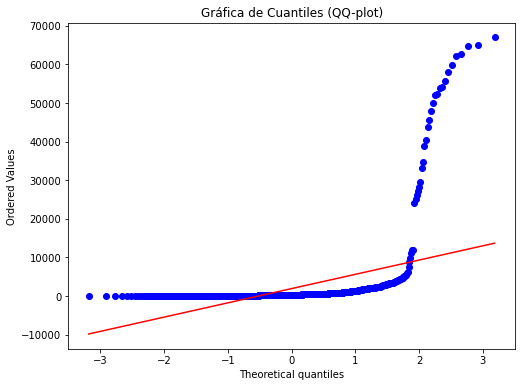

Análisis de Varianza (ANOVA):
Valor F: 390.067150581087
Valor p: 0.0


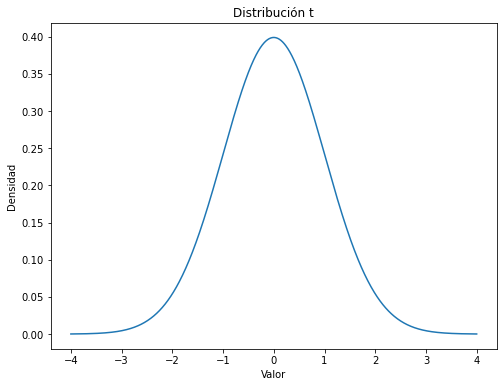

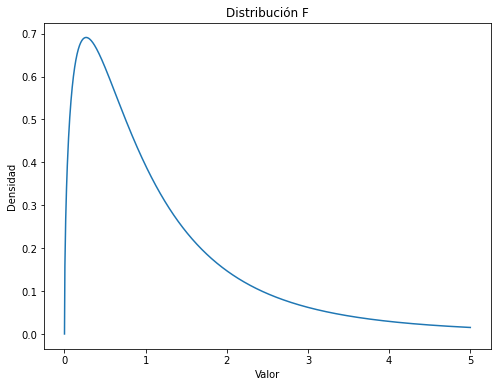

In [35]:
#BD7(PIB anual por categoria economica)
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_excel('PIB anual por categoria economica (1).xlsx') 
df=df.dropna()

# Calcular la media, varianza y desviación estándar de una columna
columna = df['Valor Corriente']  # Reemplaza 'Valor Corriente' con el nombre real de la columna

media = columna.mean()
varianza = columna.var()
desviacion_estandar = columna.std()

print("Media:", media)
print("Varianza:", varianza)
print("Desviación estándar:", desviacion_estandar)

# Gráficas de cuantiles (quantile-quantile plot) para verificar la normalidad
plt.figure(figsize=(8, 6))
stats.probplot(columna, dist='norm', plot=plt)
plt.title('Gráfica de Cuantiles (QQ-plot)')
plt.show()

# Análisis de varianza (ANOVA)
grupo = df['Categorías']  
valor = df['Valor Corriente']  

f_value, p_value = stats.f_oneway(*[valor[grupo == cat] for cat in grupo.unique()])

print("Análisis de Varianza (ANOVA):")
print("Valor F:", f_value)
print("Valor p:", p_value)

# Gráfica de distribución t
x = np.linspace(-4, 4, 1000)
plt.figure(figsize=(8, 6))
plt.plot(x, stats.t.pdf(x, len(columna)-1))
plt.title('Distribución t')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.show()

# Gráfica de distribución F
df1 = 3  # Reemplaza con el valor real del primer grado de libertad
df2 = 8  # Reemplaza con el valor real del segundo grado de libertad
x = np.linspace(0, 5, 1000)
plt.figure(figsize=(8, 6))
plt.plot(x, stats.f.pdf(x, df1, df2))
plt.title('Distribución F')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.show()


In [ ]:
----------------------------------------------------------------------------------------------------------------------------

C:\Users\19546\anaconda3\lib\site-packages\scipy\stats\stats.py:3621: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


Prueba de ANOVA:
Valor F: nan
Valor p: nan


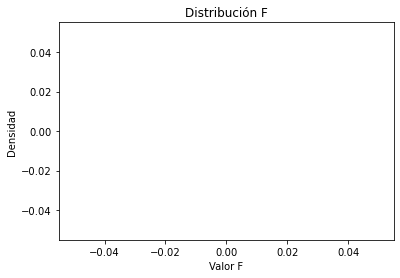

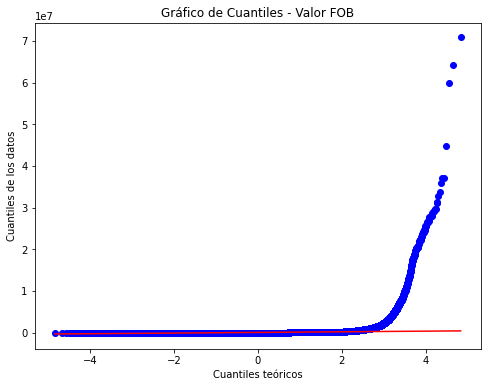

In [37]:
#BD8(Importaciones anuales)
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

data = pd.read_excel('Trimestres y Meses_IE_T_IMPORTACIONES_ANUALES_data (1).xlsx')



Prueba de ANOVA:
Valor F: 333.9226644291241
Valor p: 1.3622210136264743e-74


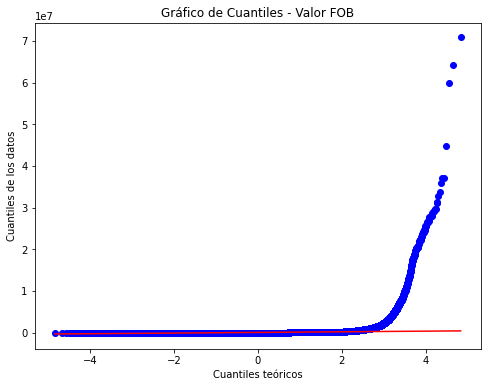

In [45]:
#BD8(Importaciones anuales)
# Realizar prueba de ANOVA
group1 = data['Valor FOB']
group2 = data['Peso neto']

f_value, p_value = stats.f_oneway(group1, group2)
print('Prueba de ANOVA:')
print('Valor F:', f_value)
print('Valor p:', p_value)


# Graficar cuantiles
plt.figure(figsize=(8, 6))
stats.probplot(data['Valor FOB'], dist='norm', plot=plt)
plt.title('Gráfico de Cuantiles - Valor FOB')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de los datos')
plt.show()

In [ ]:
----------------------------------------------------------------------------------------------------------------------------

Prueba de distribución t:
Estadístico t: -45.48137841234933
Valor p: 0.0

Prueba de distribución F:
Estadístico F: 1332.2774319848288
Valor p: 0.0


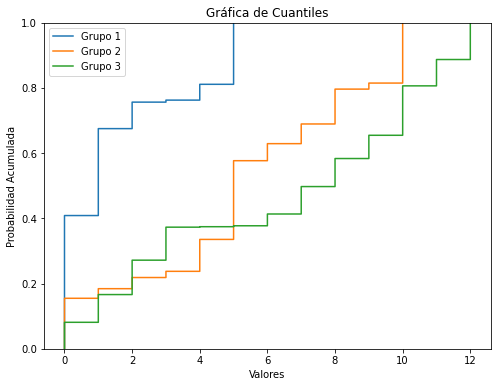


ANOVA (Análisis de varianza):
Estadístico F: 1332.2774319848288
Valor p: 0.0


In [54]:
#BD1(Accidentes automovilísticos (conductores)
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# Cargar los datos desde un archivo Excel
data = pd.read_excel('@Accidentes automovilísticos (conductores).xlsx')

# Eliminar las filas con valores nulos
data = data.dropna()

# Crear una copia de los datos para la codificación
data_encoded = data.copy()
label_encoder = LabelEncoder()
data_encoded["Material_Calle"] = label_encoder.fit_transform(data_encoded["Material_Calle"].astype(str))
data_encoded["Evento"] = label_encoder.fit_transform(data_encoded["Evento"].astype(str))
data_encoded["Provincia "] = label_encoder.fit_transform(data_encoded["Provincia "].astype(str))

# Generar datos de ejemplo (sustituye con tus propias columnas)
grupo1 = data_encoded['Material_Calle']
grupo2 = data_encoded['Evento']
grupo3 = data_encoded['Provincia ']

# Prueba de distribución t
t_stat, p_valor = stats.ttest_ind(grupo1, grupo2)
print("Prueba de distribución t:")
print("Estadístico t:", t_stat)
print("Valor p:", p_valor)

# Prueba de distribución F
f_stat, p_valor = stats.f_oneway(grupo1, grupo2, grupo3)
print("\nPrueba de distribución F:")
print("Estadístico F:", f_stat)
print("Valor p:", p_valor)

# Gráfica de cuantiles
plt.figure(figsize=(8, 6))
sns.ecdfplot(grupo1, label='Grupo 1')
sns.ecdfplot(grupo2, label='Grupo 2')
sns.ecdfplot(grupo3, label='Grupo 3')
plt.xlabel('Valores')
plt.ylabel('Probabilidad Acumulada')
plt.title('Gráfica de Cuantiles')
plt.legend()
plt.show()




# ANOVA (Análisis de varianza)
data_concat = np.concatenate([grupo1, grupo2, grupo3])
labels = ['Grupo 1'] * len(grupo1) + ['Grupo 2'] * len(grupo2) + ['Grupo 3'] * len(grupo3)
anova_stat, p_valor = stats.f_oneway(grupo1, grupo2, grupo3)
print("\nANOVA (Análisis de varianza):")
print("Estadístico F:", anova_stat)
print("Valor p:", p_valor)


In [ ]:
----------------------------------------------------------------------------------------------------------------------------

Prueba t:
Estadística t: 23.228429348802404
Valor p: 5.794688283634502e-119

Prueba F:
Estadística F: 539.363105029074
Valor p: 4.0757830417075776e-119


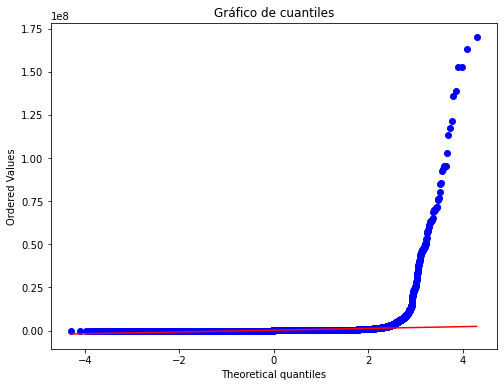

Prueba de ANOVA:
Valor F: 539.363105029074
Valor p: 4.0757830417075776e-119


In [64]:
#BD2(Exportaciones por aranceles)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Cargar los datos desde el archivo de Excel

df = pd.read_excel("@Exportaciones por aranceles (2).xlsx")
df=df.dropna()
# Prueba t
valor_fob = df["Valor FOB"]
t_statistic, p_value = stats.ttest_1samp(valor_fob, 0)
print("Prueba t:")
print("Estadística t:", t_statistic)
print("Valor p:", p_value)

# Prueba F
grupo1 = df["Codigovia"]
grupo2 = df["Valor FOB"]
f_statistic, p_value = stats.f_oneway(grupo1, grupo2)
print("\nPrueba F:")
print("Estadística F:", f_statistic)
print("Valor p:", p_value)

# Gráfica de cuantiles
plt.figure(figsize=(8, 6))
stats.probplot(df["Valor FOB"], dist="norm", plot=plt)
plt.title("Gráfico de cuantiles")
plt.show()

# Realizar prueba de ANOVA
group1 = df['Valor FOB']
group2 = df['Codigovia']

f_value, p_value = stats.f_oneway(group1, group2)
print('Prueba de ANOVA:')
print('Valor F:', f_value)
print('Valor p:', p_value)



In [ ]:
----------------------------------------------------------------------------------------------------------------------------

Prueba t:
Estadística t: 23.228429348802404
Valor p: 5.794688283634502e-119

Prueba F:
Estadística F: 539.363105029074
Valor p: 4.0757830417075776e-119


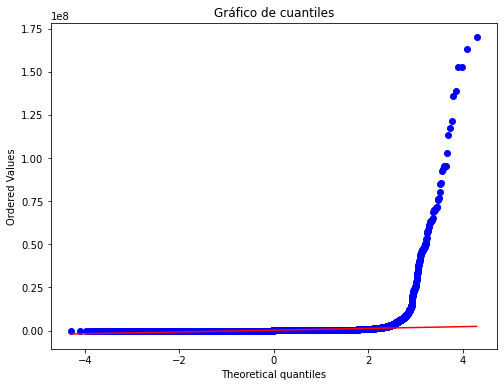

Prueba de ANOVA:
Valor F: 539.363105029074
Valor p: 4.0757830417075776e-119


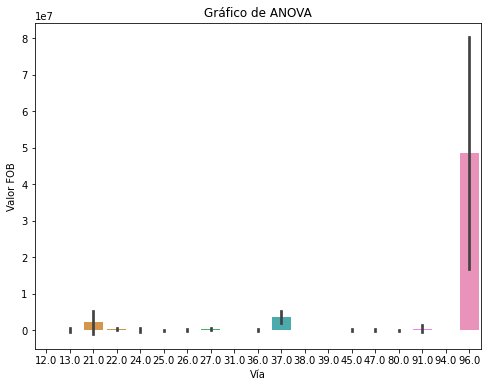

In [66]:
#BD3(Exportaciones por paises)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Cargar los datos desde un archivo excel
data = pd.read_excel('@Exportaciones por países .xlsx')

# Prueba t
valor_fob = df["Valor FOB"]
t_statistic, p_value = stats.ttest_1samp(valor_fob, 0)
print("Prueba t:")
print("Estadística t:", t_statistic)
print("Valor p:", p_value)

# Prueba F
grupo1 = df["Codigovia"]
grupo2 = df["Valor FOB"]
f_statistic, p_value = stats.f_oneway(grupo1, grupo2)
print("\nPrueba F:")
print("Estadística F:", f_statistic)
print("Valor p:", p_value)

# Gráfica de cuantiles
plt.figure(figsize=(8, 6))
stats.probplot(df["Valor FOB"], dist="norm", plot=plt)
plt.title("Gráfico de cuantiles")
plt.show()

# Realizar prueba de ANOVA
group1 = df['Valor FOB']
group2 = df['Codigovia']

f_value, p_value = stats.f_oneway(group1, group2)
print('Prueba de ANOVA:')
print('Valor F:', f_value)
print('Valor p:', p_value)

import seaborn as sns

# Crear un DataFrame para el gráfico de ANOVA
data_anova = pd.DataFrame({'Codigovia': df['Codigovia'], 'Valor FOB': df['Valor FOB']})

# Graficar ANOVA
plt.figure(figsize=(8, 6))
sns.barplot(x='Codigovia', y='Valor FOB', data=data_anova, ci='sd')
plt.xlabel('Vía')
plt.ylabel('Valor FOB')
plt.title('Gráfico de ANOVA')
plt.show()
